# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data file **

In [2]:
telco_base_data = pd.read_csv(r"C:\Users\91805\OneDrive\Desktop\churn project\tel_churn.csv")

Look at the top 5 records of data

In [3]:
telco_base_data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telco_base_data.shape

(7032, 52)

In [5]:
telco_base_data.columns.values

array(['Unnamed: 0', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'C

In [6]:
# Checking the data types of all the columns
telco_base_data.dtypes

Unnamed: 0                                   int64
SeniorCitizen                                int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                int64
gender_Male                                  int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No              

In [7]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,2032.832448,0.368844,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1762.750000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3521.500000,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5282.250000,0.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,7042.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

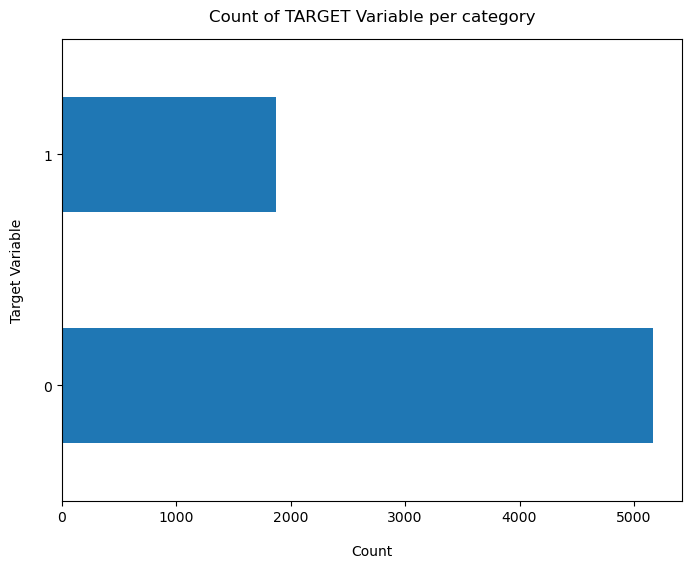

In [8]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

0    73.421502
1    26.578498
Name: Churn, dtype: float64

In [10]:
telco_base_data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 no

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [12]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [13]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

Unnamed: 0                                 0
SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [14]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [15]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [16]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

KeyError: 'tenure'

In [17]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

AttributeError: 'DataFrame' object has no attribute 'tenure'

In [18]:
telco_data['tenure_group'].value_counts()

KeyError: 'tenure_group'

**6.** Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [ ]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [ ]:
telco_data.head()

**3.** Convert all the categorical variables into dummy variables

In [ ]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

**9. ** Relationship between Monthly Charges and Total Charges

In [ ]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**10. ** Churn by Monthly Charges and Total Charges

In [ ]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

In [ ]:
plt.figure(figsize=(60,20))
corr = telco_data_dummies.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [ ]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

In [ ]:
telco_data_dummies.to_csv('tel_churn.csv')

In [ ]:
telco_base_data['CLTV_proxy'] = telco_base_data['tenure'] * telco_base_data['MonthlyCharges']
telco_base_data['Revenue_proxy'] = telco_base_data['TotalCharges']
print(telco_base_data.head())
quartiles = pd.qcut(telco_base_data['CLTV_proxy'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
telco_base_data['CLTV_Quartile'] = quartiles
print(telco_base_data.head())

In [ ]:
quartile_ranges =telco_base_data .groupby('CLTV_Quartile')['CLTV_proxy'].agg(['min', 'max'])
print(quartile_ranges)

In [ ]:
telco_base_data ['Revenue_proxy'] = pd.to_numeric(telco_base_data ['Revenue_proxy'], errors='coerce')
total_revenue = telco_base_data ['Revenue_proxy'].sum()
print("Total Revenue:", total_revenue)
num_customers = len(telco_base_data)
average_revenue = total_revenue / num_customers
print("Average Revenue:", average_revenue)
quartile_revenue = telco_base_data .groupby('CLTV_Quartile')['Revenue_proxy'].sum()
quartile_customers = telco_base_data ['CLTV_Quartile'].value_counts()
quartile_average_revenue = quartile_revenue / quartile_customers
value_added_by_quartile = quartile_revenue - (quartile_customers * average_revenue)
print("Value Added by Each Quartile Compared to Average Revenue per Customer:")
print(value_added_by_quartile)

now it can be clearly seen that high quartile is adding a lot of value so we must try our best to capitalize this and try to reduce churn rate among High quartile so we will perform a basic eda over it and try to increase retention i.e. tenure by any means 

In [ ]:
high_cltv_customers = telco_base_data[telco_base_data['CLTV_Quartile'] == 'High']

# Display the new DataFrame containing only high CLTV customers
print(high_cltv_customers)

In [ ]:
telco_base_data.head()

In [ ]:
data['CLTV_Quartile'] = pd.to_numeric(data['CLTV_Quartile'], errors='coerce')

# Define high-value customers based on CLTV quartiles or any other metric
high_value_customers = data[data['CLTV_Quartile'] == 'High']

# Churn Analysis
churn_rate_high_value = high_value_customers['Churn'].mean()
print("Churn Rate among High-Value Customers:", churn_rate_high_value)

# Segmentation Analysis
# Here's a simple example of demographic analysis:
gender_counts = high_value_customers['gender'].value_counts()
print("\nGender Distribution among High-Value Customers:")
print(gender_counts)

partner_counts = high_value_customers['Partner'].value_counts()
print("\nPartner Distribution among High-Value Customers:")
print(partner_counts)